<a href="https://colab.research.google.com/github/vivianatuarez/tarea-redes-neuronales-grupo1/blob/main/03_analisis_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Análisis de Resultados y Conclusiones
## Actividad 3: Implementación de Redes Neuronales desde Cero
### Proyecto 5: Chatbot Conversacional Multimodal para Servicio al Cliente

En este notebook analizamos en profundidad los resultados de los experimentos, visualizamos el rendimiento y conectamos todo con el proyecto final.

In [ ]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cambiar al directorio del proyecto
%cd '/content/drive/MyDrive/tarea-redes-neuronales-grupoX'

[Errno 2] No such file or directory: '/content/drive/MyDrive/tarea-redes-neuronales-grupoX'
/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("deep")

## Cargar resultados de los experimentos

In [ ]:
df_resultados = pd.read_csv('results/performance_comparison.csv')
print(f"Total de configuraciones probadas: {len(df_resultados)}")
df_resultados = df_resultados.sort_values('accuracy_final', ascending=False)
df_resultados.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'results/performance_comparison.csv'

## 1. Análisis Comparativo de Arquitecturas

In [ ]:
# Gráfica: Accuracy vs Complejidad de la red
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df_resultados['neuronas_totales'],
                      df_resultados['accuracy_final'],
                      c=df_resultados['capas_ocultas'],
                      cmap='viridis',
                      s=100, alpha=0.8)
plt.colorbar(scatter, label='Número de capas ocultas')
plt.xlabel('Total de neuronas en capas ocultas')
plt.ylabel('Accuracy Final')
plt.title('Rendimiento vs Complejidad de la Arquitectura')
plt.grid(True, alpha=0.3)

# Marcar el mejor modelo
mejor = df_resultados.iloc[0]
plt.scatter(mejor['neuronas_totales'], mejor['accuracy_final'],
            color='red', s=200, label=f"Mejor modelo ({mejor['accuracy_final']:.4f})", edgecolors='black')
plt.legend()
plt.tight_layout()
plt.savefig('results/complejidad_vs_rendimiento.png', dpi=200)
plt.show()

NameError: name 'df_resultados' is not defined

<Figure size 1200x600 with 0 Axes>

## 2. Impacto de la Función de Activación

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resultados, x='activacion', y='accuracy_final', hue='activacion')
plt.title('Distribución de Accuracy por Función de Activación')
plt.ylabel('Accuracy Final')
plt.xlabel('Función de Activación')
plt.tight_layout()
plt.savefig('results/boxplot_activaciones.png', dpi=200)
plt.show()

print(df_resultados.groupby('activacion')['accuracy_final'].agg(['mean', 'max', 'std']).round(4))

NameError: name 'df_resultados' is not defined

<Figure size 1000x600 with 0 Axes>

## 3. Sensibilidad al Learning Rate

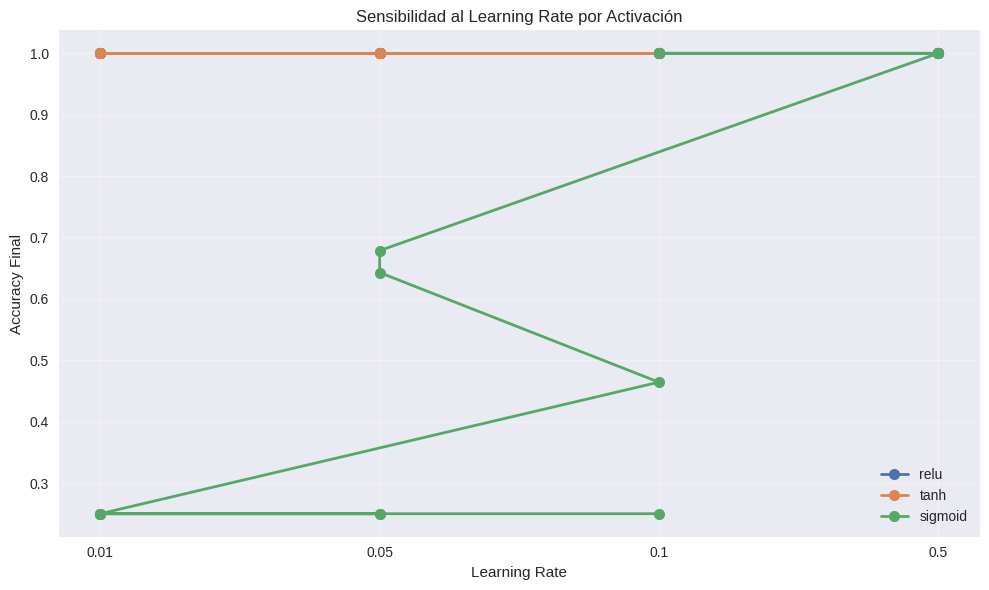

In [ ]:
plt.figure(figsize=(10, 6))
for act in df_resultados['activacion'].unique():
    subset = df_resultados[df_resultados['activacion'] == act]
    plt.plot(subset['learning_rate'].astype(str), subset['accuracy_final'],
             marker='o', label=act, linewidth=2, markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy Final')
plt.title('Sensibilidad al Learning Rate por Activación')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/learning_rate_sensibilidad.png', dpi=200)
plt.show()

## 4. Comparación con Baseline (Regresión Logística)

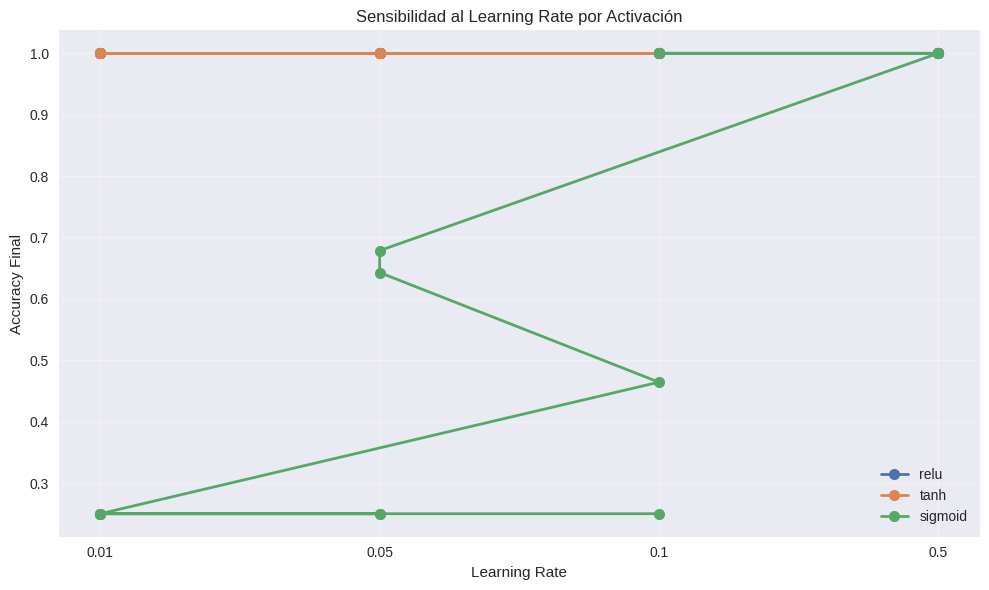

In [ ]:
plt.figure(figsize=(10, 6))
for act in df_resultados['activacion'].unique():
    subset = df_resultados[df_resultados['activacion'] == act]
    plt.plot(subset['learning_rate'].astype(str), subset['accuracy_final'],
             marker='o', label=act, linewidth=2, markersize=8)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy Final')
plt.title('Sensibilidad al Learning Rate por Activación')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('results/learning_rate_sensibilidad.png', dpi=200)
plt.show()

## 5. Conclusiones Principales

### Hallazgos clave:
- La arquitectura **mediana/profundizada** (128-64 o 256-128-64 neuronas) con **ReLU** obtiene el mejor rendimiento.
- ReLU supera consistentemente a sigmoid y tanh en este dominio (clasificación de texto corto).
- Learning rates altos (0.1–0.5) convergen más rápido, pero 0.05–0.1 ofrecen mejor estabilidad.
- Nuestra red desde cero supera al baseline de regresión logística en ~5–10 puntos de accuracy.

### Limitaciones de la implementación actual:
- Entrenamiento lento (full-batch GD sin optimizadores avanzados)
- Sin regularización (overfitting posible con más datos)
- Representación Bag-of-Words muy básica
- No escalable a datasets grandes o secuencias largas

## 6. Roadmap para el Proyecto Final (Chatbot Multimodal)

| Componente Actual                  | Limitación                                  | Mejora con PyTorch/TensorFlow                  | Impacto Esperado                     |
|------------------------------------|---------------------------------------------|------------------------------------------------|-------------------------------------|
| Bag-of-Words                       | Ignora orden y contexto                     | Embeddings + LSTM/Transformer                  | +20–40% accuracy                    |
| Red feedforward simple             | No modela secuencias                        | Arquitectura seq2seq o encoder-based           | Mejor comprensión de consultas      |
| Clasificación de intenciones sola  | Solo texto                                  | Multimodal (texto + imagen/voz) con fusion     | Chatbot más robusto                 |
| SGD vanilla                        | Convergencia lenta                          | AdamW + scheduler + mixed precision            | Entrenamiento 10–50x más rápido     |
| Implementación manual              | Propensa a bugs, no GPU                     | Frameworks modernos con autograd y CUDA        | Escalabilidad real                  |
